In [2]:
import boto3
import os
import json
from IPython.display import Markdown, display

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(
    service_name='bedrock-runtime',
    region_name="us-east-1",
)

In [4]:
#read word docs
import docx

In [3]:

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [6]:
note = getText("Vector-notes.docx")

In [7]:
# book = ''
# with open('Vector-notes.docx', 'r') as f:
#     book = f.read()
# print('Context:', book[0:53], '...')
# print('The context contains', len(book.split(' ')), 'words')

In [8]:
# prompt =f'''Human: create question 2 multiple choice question and answer

# <book>
# {note}
# </book>

# Assistant:'''

# body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000,})
# response = boto3_bedrock.invoke_model(
#     body=body, modelId='anthropic.claude-v2', accept='application/json', contentType='application/json'
# )
# response_body = json.loads(response.get('body').read())
# output = response_body.get("completion").strip()
# display(Markdown(output))

In [3]:
question = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [4]:
prompt =f'''Human: create a python script using turtle which create images and save the image in jpg
<book>
{question}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000,})
response = boto3_bedrock.invoke_model(
    body=body, modelId='anthropic.claude-v2', accept='application/json', contentType='application/json'
)
response_body = json.loads(response.get('body').read())
output = response_body.get("completion").strip()
display(Markdown(output))

Here is a Python script using turtle to draw a hexagon and save the image as a jpg file:

```python
import turtle
import time

turtle.penup()
turtle.goto(-100, -50)
turtle.pendown()

for i in range(6):
  turtle.forward(200)
  turtle.left(60)

time.sleep(5) 

ts = turtle.getscreen()
ts.getcanvas().postscript(file="hexagon.eps") 

from PIL import Image
img = Image.open("hexagon.eps")  
img.save("hexagon.jpg", "jpeg")

print("Image saved as hexagon.jpg")
```

This code uses the turtle module to draw a hexagon by moving forward 200 units 6 times, turning left 60 degrees each time. 

It pauses for 5 seconds to display the hexagon, then uses the Screen's postscript method to save the image as an EPS file. 

The PIL module is used to open this EPS file and save it as a JPEG image.

To find the sum of the sides AB+BC+CD+DE+AF+FE+AE, we know a regular hexagon has all sides equal length. If we call each side length `s`:

`AB + BC + CD + DE + AF + FE + AE = s + s + s + s + s + s + s = 7s`

So the sum is `7s`, where `s` is the length of each side.

In [7]:
#write python function to extract the python code
def extract_code(text):
    code = ""
    in_code = False
    for line in text.splitlines():
        if line.strip().startswith("```"):
            in_code = not in_code
        elif in_code:
            code += line + "\n"
    return code

In [10]:
text  = display(Markdown(extract_code(output)))

import turtle
import time

turtle.penup()
turtle.goto(-100, -50)
turtle.pendown()

for i in range(6):
  turtle.forward(200)
  turtle.left(60)

time.sleep(5) 

ts = turtle.getscreen()
ts.getcanvas().postscript(file="hexagon.eps") 

from PIL import Image
img = Image.open("hexagon.eps")  
img.save("hexagon.jpg", "jpeg")

print("Image saved as hexagon.jpg")


In [16]:
import turtle 
import time

turtle.penup() 
turtle.goto(-100, -50) 
turtle.pendown()

for i in range(6): 
    turtle.forward(200) 
    turtle.left(60)

time.sleep(5)

ts = turtle.getscreen() 
ts.getcanvas().postscript(file="hexagon.eps")



OSError: Unable to locate Ghostscript on paths

In [21]:
import os
os.environ['PATH'] += os.pathsep + '/Users/tiwarysa/Documents/Mathproblem/'

from PIL import Image 
img = Image.open("hexagon.eps")
img.save("hexagon.jpg", "jpeg")

print("Image saved as hexagon.jpg")

OSError: Unable to locate Ghostscript on paths

: 

In [4]:
import tkinter
print(tkinter.TkVersion)

8.6


In [14]:
import turtle
import math

# Set up the screen
screen = turtle.Screen()
screen.bgcolor("lightgray")

# Create a turtle instance
t = turtle.Turtle()
t.speed(2)  # Adjust the drawing speed as desired
t.penup()

# Define the function to draw a regular polygon
def draw_regular_polygon(sides, length):
    angle = 360 / sides
    t.pendown()
    for _ in range(sides):
        t.forward(length)
        t.left(angle)
    t.penup()

# Define the function to label the vertices
def label_vertices(vertices):
    t.penup()
    for vertex in vertices:
        t.goto(vertex[0], vertex[1])  # Separate x and y coordinates
        t.pendown()
        t.write(vertex[2], align="center", font=("Arial", 12, "bold"))
        t.penup()

# Define the coordinates of the vertices for a regular hexagon
radius = 100
angle = 60  # 360 / 6 (sides of the hexagon)
vertices = [(radius * math.cos(0), radius * math.sin(0), "A"),
            (radius * math.cos(angle * math.pi / 180), radius * math.sin(angle * math.pi / 180), "B"),
            (radius * math.cos(2 * angle * math.pi / 180), radius * math.sin(2 * angle * math.pi / 180), "C"),
            (radius * math.cos(3 * angle * math.pi / 180), radius * math.sin(3 * angle * math.pi / 180), "D"),
            (radius * math.cos(4 * angle * math.pi / 180), radius * math.sin(4 * angle * math.pi / 180), "E"),
            (radius * math.cos(5 * angle * math.pi / 180), radius * math.sin(5 * angle * math.pi / 180), "F")]

# Draw the hexagon
t.goto(vertices[0][0], vertices[0][1])  # Separate x and y coordinates
draw_regular_polygon(6, 2 * radius * math.sin(math.pi / 6))  # Calculate the side length

# Label the vertices
label_vertices(vertices)

# Write the question
t.penup()
t.goto(0, -150)
t.write("ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE", align="center", font=("Arial", 14, "bold"))

# Save the image and close the screen
turtle.getcanvas().postscript(file="hexagon.eps", colormode='color')
turtle.bye()

TclError: invalid command name ".!canvas"

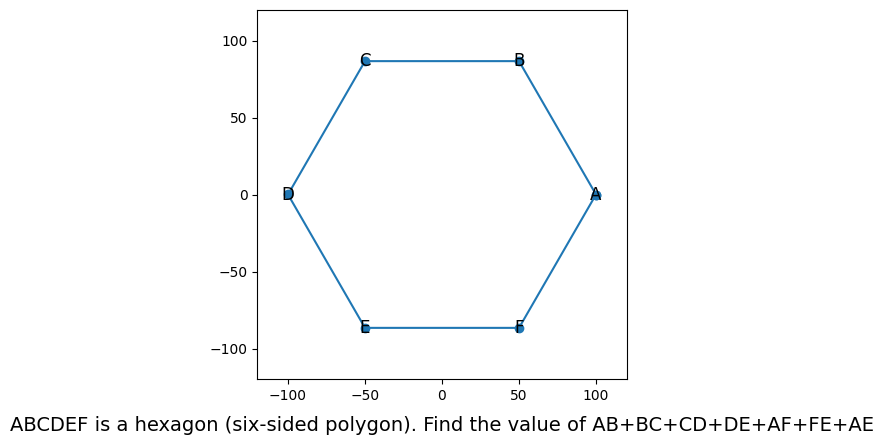

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to draw a regular polygon
def draw_regular_polygon(ax, sides, length, center=(0, 0)):
    angle = 2 * np.pi / sides
    x, y = center
    points = []
    for i in range(sides):
        points.append((x + length * np.cos(i * angle), y + length * np.sin(i * angle)))
    points.append(points[0])  # Close the polygon
    xs, ys = zip(*points)
    ax.plot(xs, ys, marker='o')

# Define the function to label the vertices
def label_vertices(ax, vertices):
    for vertex in vertices:
        ax.text(vertex[0], vertex[1], vertex[2], fontsize=12, ha='center', va='center')

# Define the coordinates of the vertices for a regular hexagon
radius = 100
angle = 2 * np.pi / 6  # 360 / 6 (sides of the hexagon)
vertices = [(radius * np.cos(i * angle), radius * np.sin(i * angle), chr(65 + i)) for i in range(6)]

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the hexagon
draw_regular_polygon(ax, 6, 2 * radius * np.sin(np.pi / 6))

# Label the vertices
label_vertices(ax, vertices)

# Write the question
ax.text(0, -150, "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE",
        fontsize=14, ha='center', va='center')

# Set aspect ratio to equal and adjust limits
ax.set_aspect('equal')
ax.set_xlim(-radius * 1.2, radius * 1.2)
ax.set_ylim(-radius * 1.2, radius * 1.2)

# Save the image
plt.savefig("hexagon.png")

# Show the plot
plt.show()
